In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nsC = [25,30,35,40,45,60,75,90,105,120,125,130,135,140,145,150]

dfs_Carbon = {}

for n in ns:
    #/Users/Camden/Python/442/442Compton/Data/Carbon/
    df = pd.read_csv('Data/Carbon/'+str(n)+'.txt', sep='\t')

    #df.plot(x=0,y=1)
    #plt.title(r'Spectrum for $%d\degree$' % n)
    #plt.show()
    dfs_Carbon[n]=df

In [56]:
ns = [30,60,90,120,150]

dfs_Plex = {}

for n in ns:
    df = pd.read_csv('Data/Plexiglass/Slit Collimator/'+str(n)+'.txt', sep='\t')

    #df.plot(x=0,y=1)
    #plt.title(r'Spectrum for $%d\degree$' % n)
    #plt.show()
    dfs_Plex[n]=df

In [ ]:
ns = [30,60,90]

dfs_Cobalt = {}

for n in ns:
    df = pd.read_csv('Data/Cobalt/Magnetized Up/'+str(n)+'.txt', sep='\t')

    df.plot(x=0,y=1)
    plt.title(r'Spectrum for $%d\degree$' % n)
    plt.show()
    dfs_Plex[n]=df

In [58]:
ns = ['30','60','90']

dfs_Cobalt_Filters = {}

for n in ns:
    df = pd.read_csv('Data/Cobalt/'+n+'.txt', sep='\t')

    #df.plot(x=0,y=1)
    #plt.title(r'Spectrum for $%d\degree$' % n)
    #plt.show()
    dfs_Plex[n]=df

In [4]:
ns = ['Mo Filter','No Filter','Zr Filter']

dfs_Calib = {}

for i,n in enumerate(ns):
    df = pd.read_csv('Data/No Target/'+str(n)+'.txt', sep='\t')

    #df.plot(x=0,y=1)
    #if i == 0:
    #    plt.title('Spectrum for Mo Filter')
    #elif i == 1:
    #    plt.title('Unaltered Spectrum')
    #else:
    #    plt.title('Spectrum for Zr Filter')
    #plt.show()
    dfs_Calib[n]=df

['Counts, Uncertainty\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n', '2676.000000, 13.201098\n']


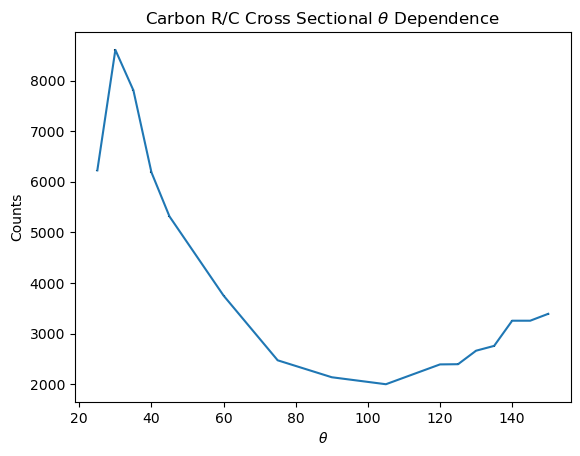

In [151]:
ns = [25,30,35,40,45,60,75,90,105,120,125,130,135,140,145,150]

fileC = open("Carbon Cross Section.txt", "w")

integralsC = []
errorsC = []
peaksC = {}
lines = ['Counts, Uncertainty\n']
for n in ns:
    Es = dfs_Carbon[n].iloc[:,0].to_numpy()
    counts = dfs_Carbon[n].iloc[:,1].to_numpy()
    
    peaks = []
    Epeaks = []
    for i,E in enumerate(Es):
        if E > 15.5 and E < 18.5:
            peaks.append(counts[i])
            Epeaks.append(E)
    peaks = np.array(peaks)
    peaksC[n] = peaks,Epeaks
    errorsC.append(np.sqrt(np.sum(np.sqrt(peaks))))
    integralsC.append(peaks.sum())
    lines.append('%f, %f\n' % (integrals[-1],errors[-1]))
        
fileC.writelines(lines)
fileC.close()
print(lines)
    
plt.errorbar(ns,integralsC,yerr=errorsC,ecolor='black')
plt.xlabel(r'$\theta$')
plt.ylabel('Counts')
plt.title(r'Carbon R/C Cross Sectional $\theta$ Dependence')
plt.show()
            

['Counts, Uncertainty\n', '2680.000000, 12.778801\n', '1524.000000, 11.307803\n', '1245.000000, 10.826272\n', '1445.000000, 11.156840\n', '1857.000000, 11.798347\n']


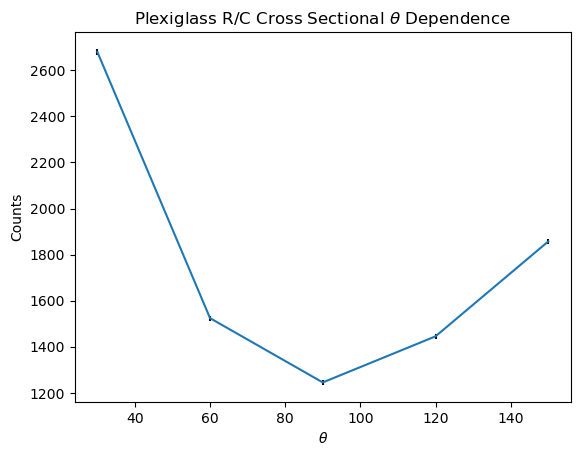

In [57]:
ns = [30,60,90,120,150]

fileC = open("Plexiglass Cross Section.txt", "w")

integrals = []
errors = []
lines = ['Counts, Uncertainty\n']
for n in ns:
    Es = dfs_Plex[n].iloc[:,0].to_numpy()
    counts = dfs_Plex[n].iloc[:,1].to_numpy()
    
    peaks = []
    for i,E in enumerate(Es):
        if E > 16 and E < 18:
            peaks.append(counts[i])
    peaks = np.array(peaks)
    errors.append(np.sqrt(np.sum(np.sqrt(peaks))))
    integrals.append(peaks.sum())
    lines.append('%f, %f\n' % (integrals[-1],errors[-1]))
        
fileC.writelines(lines)
fileC.close()
print(lines)
    
plt.errorbar(ns,integrals,yerr=errors,ecolor='black')
plt.xlabel(r'$\theta$')
plt.ylabel('Counts')
plt.title(r'Plexiglass R/C Cross Sectional $\theta$ Dependence')
plt.show()
            

In [242]:
import scipy as sp

def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))

m_e = 511
kA_Mo = 17.479372

def compton_shift(theta, E_0):
    return E_0/(1+E_0/m_e*(1-np.cos(np.pi/180*theta)))

In [243]:
print(compton_shift(n, kA_Mo))

16.43061176798843


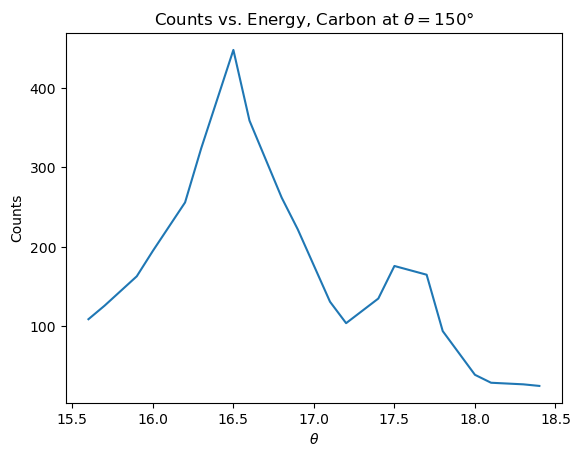

In [244]:
n = 150

peaks,Es = peaksC[n]
plt.plot(Es,peaks)
plt.title(r'Counts vs. Energy, Carbon at $\theta = %d \degree$' % n)
plt.xlabel(r'$\theta$')
plt.ylabel('Counts')
plt.show()

In [123]:
#guesses from graph and compton
amp1 = 200
cen1 = compton_shift(n, kA_Mo)
sigma1 = 0.5

amp2 = 200
cen2 = 17.5
sigma2 = 0.5

popt_2gauss, pcov_2gauss = sp.optimize.curve_fit(_2gaussian, Es, peaks, p0=[amp1, cen1, sigma1, amp2, cen2, sigma2])
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_1 = popt_2gauss[0:3]
perr_1 = perr_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
perr_2 = perr_2gauss[3:6]
gauss_peak_1 = _1gaussian(Es, *pars_1)
gauss_peak_2 = _1gaussian(Es, *pars_2)

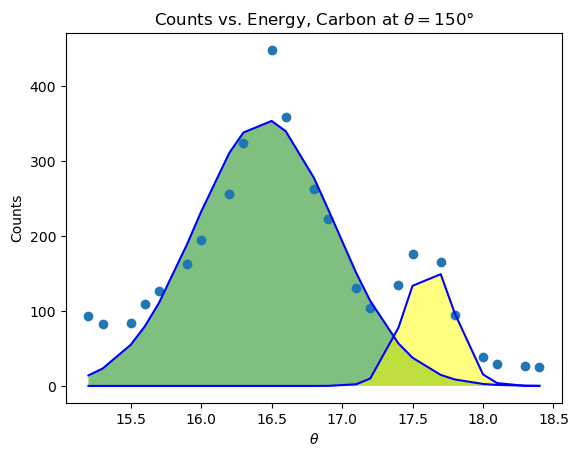

In [121]:
plt.plot(Es,peaks,'o')
plt.plot(Es,gauss_peak_1,'b-')
plt.plot(Es,gauss_peak_2,'b-')
plt.fill_between(Es, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5) 
plt.fill_between(Es, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5) 
plt.title(r'Counts vs. Energy, Carbon at $\theta = %d \degree$' % 150)
plt.xlabel(r'$\theta$')
plt.ylabel('Counts')
plt.show()

In [187]:
def red_chi_2(f,y,y_err):
    return np.sum(((y-f)**2)/(y_err**2))/len(y)

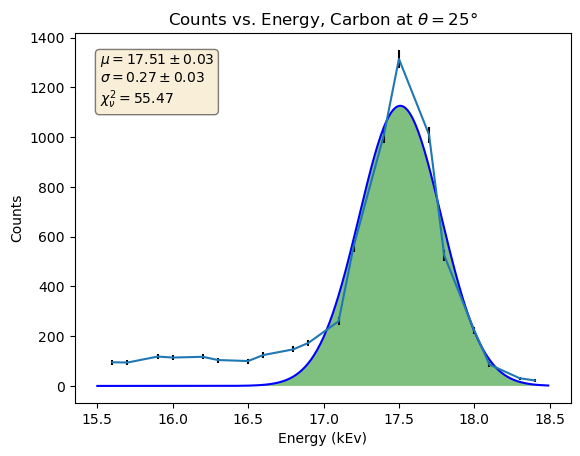

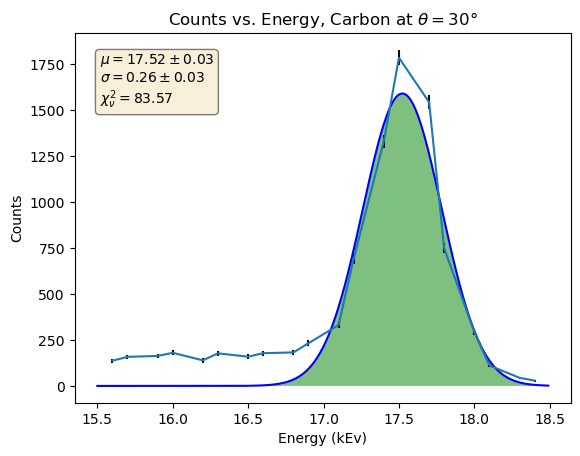

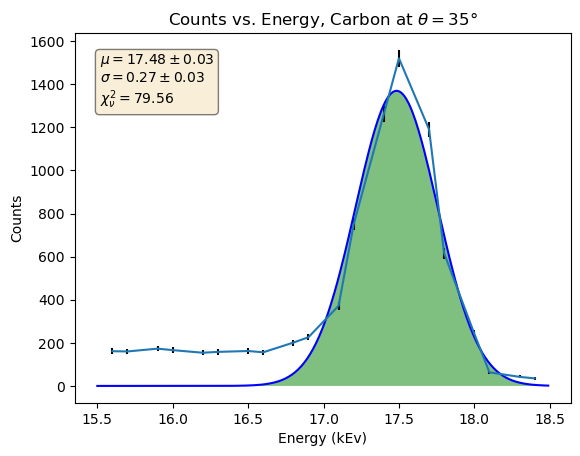

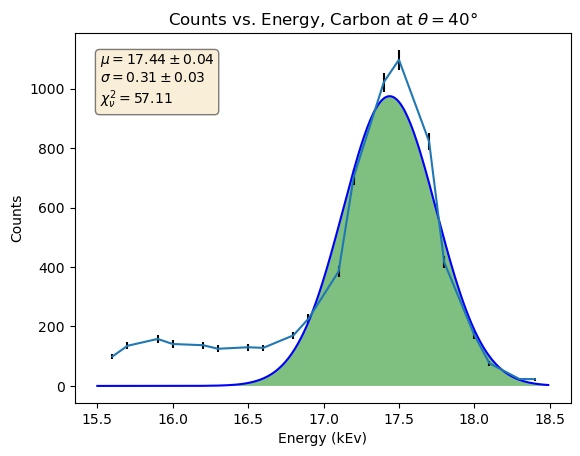

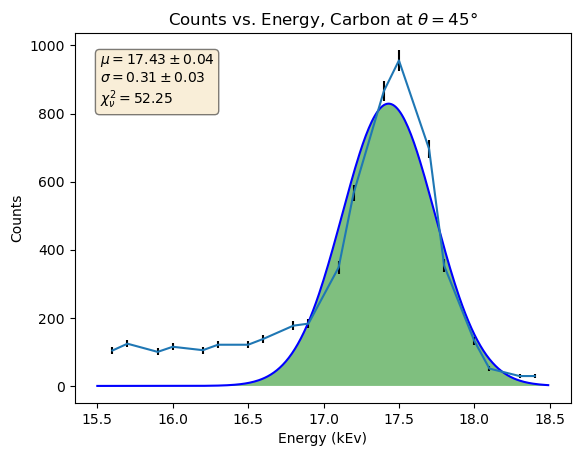

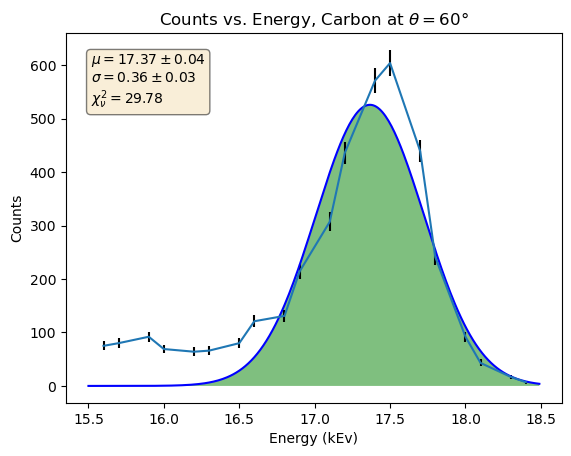

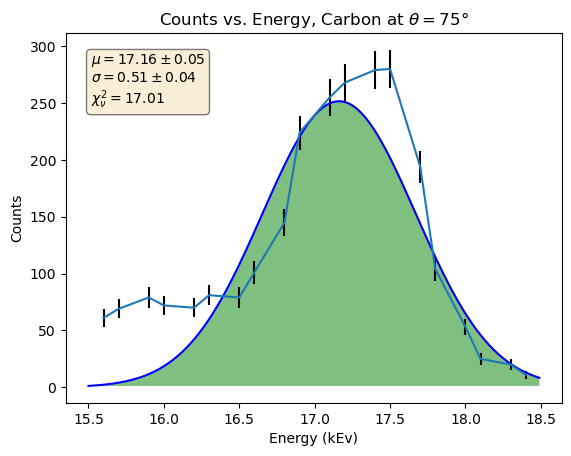

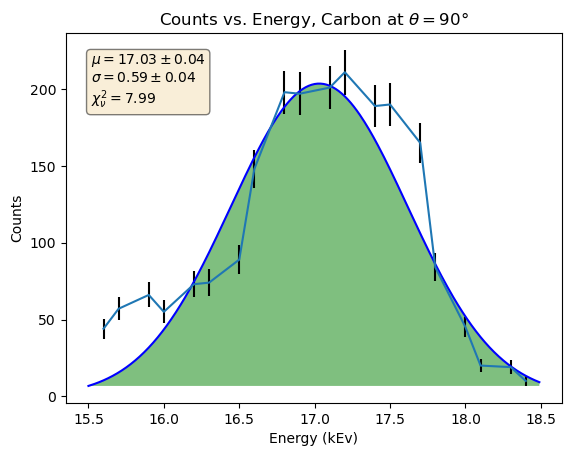

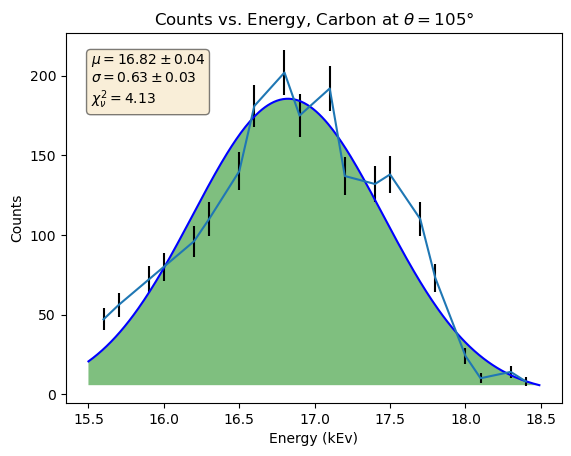

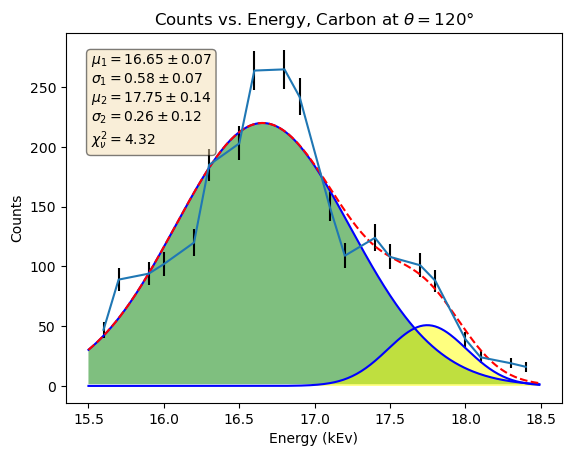

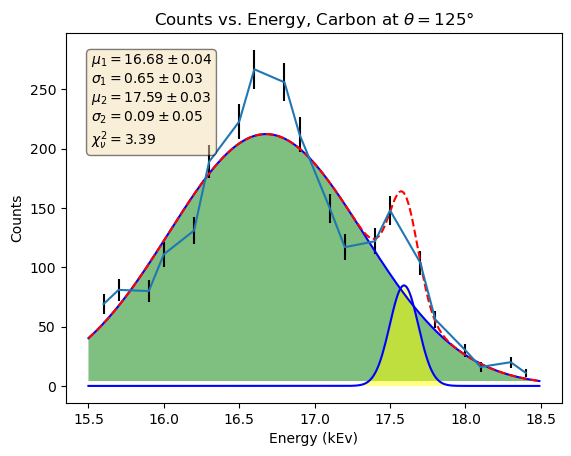

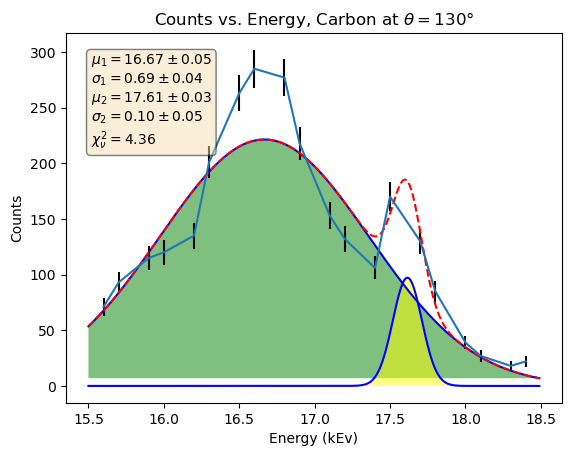

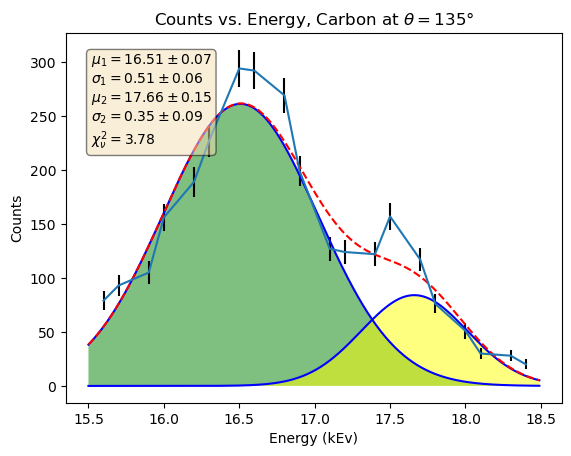

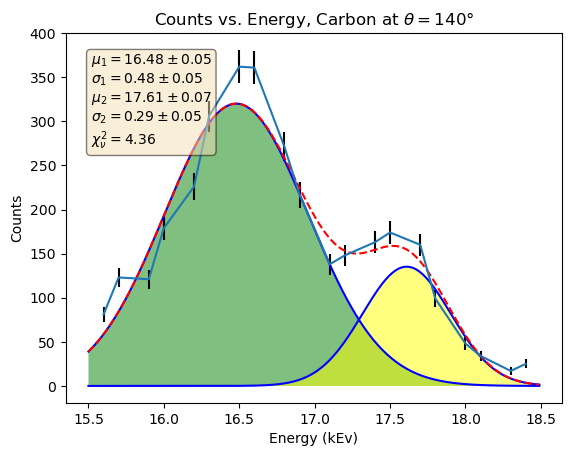

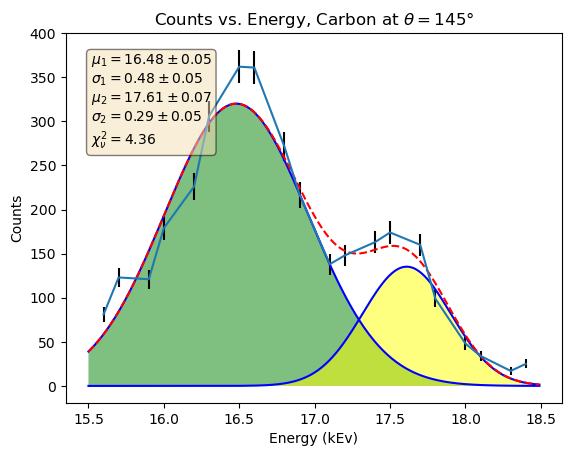

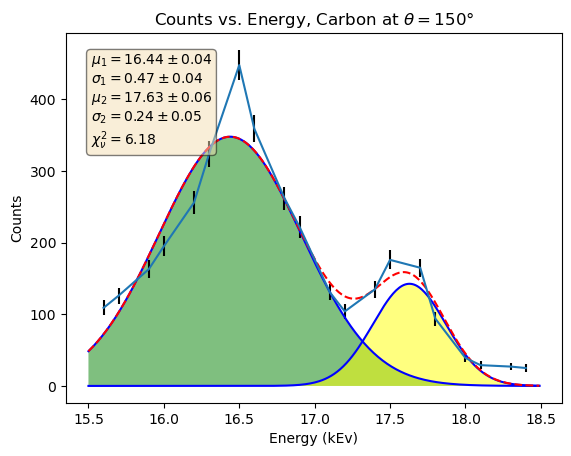

In [188]:
ns = nsC 

pars = {}
perrs = {}

for n in ns:
    peaks,Es = peaksC[n]
    amp1 = 300
    cen1 = compton_shift(n, kA_Mo)
    sigma1 = 0.5
    
    fig,ax = plt.subplots()
    
    if n > 115:
        amp2 = 150
        cen2 = 17.5
        sigma2 = 0.5

        popt_2gauss, pcov_2gauss = sp.optimize.curve_fit(_2gaussian, Es, peaks, p0=[amp1, cen1, sigma1, amp2, cen2, sigma2],sigma=np.sqrt(peaks))
        perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
        pars_1 = popt_2gauss[0:3]
        perr_1 = perr_2gauss[0:3]
        pars_2 = popt_2gauss[3:6]
        perr_2 = perr_2gauss[3:6]
        gauss_peak_1 = _1gaussian(np.arange(15.5,18.5,0.01), *pars_1)
        gauss_peak_2 = _1gaussian(np.arange(15.5,18.5,0.01), *pars_2)
    
        pars[n] = popt_2gauss
        perrs[n] = perr_2gauss
    
        mu1 = pars_1[1]
        muE1 = perr_1[1]
        sigma1 = pars_1[2]
        sigmaE1 = perr_1[2]
        mu2 = pars_2[1]
        muE2 = perr_2[1]
        sigma2 = pars_2[2]
        sigmaE2 = perr_2[2]
        
        chi = red_chi_2(_1gaussian(Es, *pars_2)+_1gaussian(Es, *pars_1),peaks,np.sqrt(peaks))
        
        textstr = '\n'.join((
            r'$\mu_1=%.2f\pm%.2f$' % (mu1, muE1),
            r'$\sigma_1=%.2f\pm%.2f$' % (sigma1, sigmaE1),
            r'$\mu_2=%.2f\pm%.2f$' % (mu2, muE2),
            r'$\sigma_2=%.2f\pm%.2f$' % (sigma2, sigmaE2),
            r'$\chi^2_{\nu}=%.2f$' % (chi, )))

        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    
        plt.errorbar(Es,peaks,yerr=np.sqrt(peaks),ecolor='black')
        ax.plot(np.arange(15.5,18.5,0.01),gauss_peak_1,'b-')
        ax.plot(np.arange(15.5,18.5,0.01),gauss_peak_2,'b-')
        ax.plot(np.arange(15.5,18.5,0.01),gauss_peak_1+gauss_peak_2,'r--')
        ax.fill_between(np.arange(15.5,18.5,0.01), gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5) 
        ax.fill_between(np.arange(15.5,18.5,0.01), gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5) 
        plt.title(r'Counts vs. Energy, Carbon at $\theta = %d \degree$' % n)
        plt.xlabel('Energy (kEv)')
        plt.ylabel('Counts')
        
        plt.show()
    else:
        popt_gauss, pcov_gauss = sp.optimize.curve_fit(_1gaussian, Es, peaks, p0=[amp1, cen1, sigma1],sigma=np.sqrt(peaks))
        perr_gauss = np.sqrt(np.diag(pcov_gauss))
        gauss_peak = _1gaussian(np.arange(15.5,18.5,0.01), *popt_gauss)
        
        pars[n] = popt_gauss
        perrs[n] = perr_gauss

        mu = popt_gauss[1]
        muE = perr_gauss[1]
        sigma = popt_gauss[2]
        sigmaE = perr_gauss[2]
        
        chi = red_chi_2(_1gaussian(Es, *popt_gauss),peaks,np.sqrt(peaks))
        
        textstr = '\n'.join((
            r'$\mu=%.2f\pm%.2f$' % (mu, muE),
            r'$\sigma=%.2f\pm%.2f$' % (sigma, sigmaE),
            r'$\chi^2_{\nu}=%.2f$' % (chi, )))

        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
        
        plt.errorbar(Es,peaks,yerr=np.sqrt(peaks),ecolor='black')
        plt.plot(np.arange(15.5,18.5,0.01),gauss_peak,'b-')
        plt.fill_between(np.arange(15.5,18.5,0.01), gauss_peak.min(), gauss_peak, facecolor="green", alpha=0.5)
        plt.title(r'Counts vs. Energy, Carbon at $\theta = %d \degree$' % n)
        plt.xlabel('Energy (kEv)')
        plt.ylabel('Counts')
        plt.show()
        
        
        

In [258]:
mus = {}
sigmas = {}
SDMs = {}

for n in ns:
    mu1 = pars[n][1]
    sigma1 = pars[n][2]+perrs[n][2]
    peaks,Es = peaksC[n]
    Cs_compton_peak = []
    #add up all counts within 2 sigma of the mean to count as N
    for i,counts in enumerate(peaks):
        #number of sigmas range
        p = 0.2
        if Es[i] > mu1-p*sigma1 and Es[i] < mu1+p*sigma1:
            Cs_compton_peak.append(counts)
    Cs_compton_peak = np.array(Cs_compton_peak)
    N = np.sum(Cs_compton_peak)
    SDM = (sigma1)/np.sqrt(N)
    mus[n] = mu1
    sigmas[n] = sigma1
    SDMs[n] = SDM

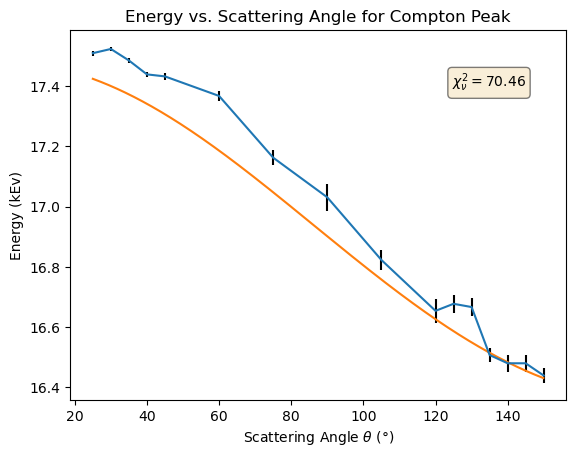

In [263]:
plt.errorbar(list(mus.keys()),list(mus.values()),yerr=list(SDMs.values()),ecolor='black')
thetas = np.arange(25,150,0.1)
plt.plot(thetas,compton_shift(thetas, 17.58589508))

x = np.array(list(mus.keys()))
f = compton_shift(x, kA_Mo)
y = np.array(list(mus.values()))
y_err = np.array(list(SDMs.values()))
chi = red_chi_2(f,y,y_err)

textstr = r'$\chi^2_{\nu}=%.2f$' % chi

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.75, 0.90, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.title('Energy vs. Scattering Angle for Compton Peak')
plt.xlabel(r'Scattering Angle $\theta$ ($\degree$)')
plt.ylabel('Energy (kEv)')
plt.show()

In [261]:
Compton_opt,x = sp.optimize.curve_fit(compton_shift,x,y,p0=kA_Mo,sigma=y_err)
print(Compton_opt)

[17.58589508]


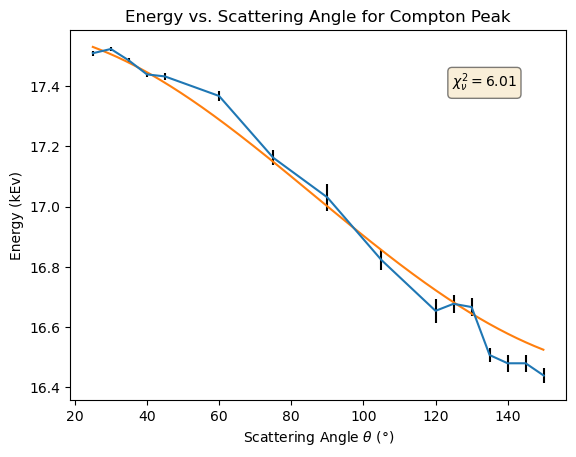

In [262]:
plt.errorbar(list(mus.keys()),list(mus.values()),yerr=list(SDMs.values()),ecolor='black')
thetas = np.arange(25,150,0.1)
plt.plot(thetas,compton_shift(thetas, 17.58589508))

x = np.array(list(mus.keys()))
f = compton_shift(x, 17.58589508)
y = np.array(list(mus.values()))
y_err = np.array(list(SDMs.values()))
chi = red_chi_2(f,y,y_err)

textstr = r'$\chi^2_{\nu}=%.2f$' % chi

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.75, 0.90, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.title('Energy vs. Scattering Angle for Compton Peak')
plt.xlabel(r'Scattering Angle $\theta$ ($\degree$)')
plt.ylabel('Energy (kEv)')
plt.show()